In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


## Conjunto de dados

In [ ]:
#impotando aa bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_excel('/content/drive/My Drive/Bootcamp Data Sience Neuron/dados desafio/CLIMA SZEGED/weather_szeged_train.xlsx')

#dimensão do dataset
print("O dataset possui {} linhas (registros) e {} colunas (features)".format(df.shape[0], df.shape[1]))


O dataset possui 998 linhas (registros) e 6 colunas (features)


> **Uma amostra do dataset**

In [ ]:
df.head(10) 

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,19.400000,19.400000,0.93,6.2790,14.7315,1018.23
1,4.950000,3.122222,1.00,7.8890,5.8926,1000.86
2,22.661111,22.661111,0.38,13.9426,16.0517,1022.64
3,17.044444,17.044444,0.81,12.9766,14.9569,1008.99
4,1.061111,-4.494444,0.56,24.7779,15.8263,1013.73
5,2.238889,-2.650000,0.79,21.9604,10.8192,1008.84
6,3.933333,2.422222,0.76,6.2629,15.8263,1017.12
7,19.105556,19.105556,0.50,12.8800,11.3988,1022.37
8,15.216667,15.216667,0.95,3.0590,15.3111,1023.20
9,8.955556,7.138889,0.99,11.5115,4.0250,1009.19


> **Estatistica descritiva dos atributos**

In [ ]:
 df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
count,998.000000,998.000000,998.000000,998.000000,998.000000,998.00000
mean,10.978084,9.908962,0.773317,10.299289,9.739774,999.05508
std,9.367005,10.594406,0.170484,6.747872,4.016944,139.47797
min,-14.022222,-19.961111,0.290000,0.000000,0.000000,0.00000
25%,2.800000,0.795833,0.670000,4.878300,7.973525,1012.91250
50%,11.622222,11.622222,0.810000,9.378250,9.982000,1017.47500
75%,17.908333,17.908333,0.920000,13.821850,11.270000,1022.61500
max,32.877778,33.566667,1.000000,45.933300,16.051700,1042.83000


In [ ]:
#plot de Temperature X Humidity

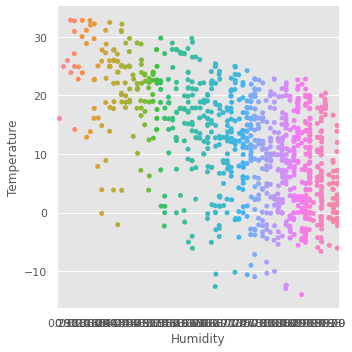

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

sns.catplot('Humidity','Temperature (C)', data=df)
plt.ylabel('Temperature')
plt.xlabel('Humidity')

plt.show()

## Analise de relação entre as variáveis

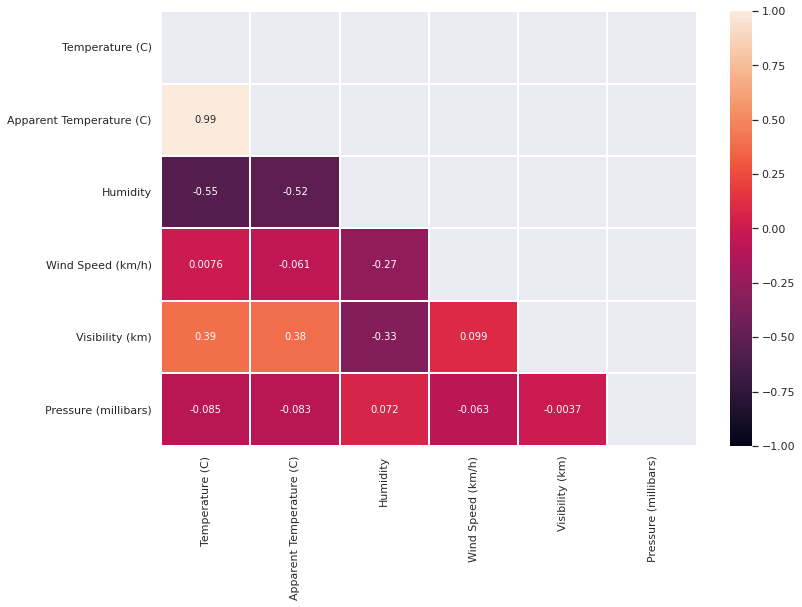

In [ ]:
# Matriz de correlação
corr=df.corr(method='pearson') # É possivel definir o método 

# Desenvolvendo o gráfico de correlação 
np.triu ( np.ones ( corr.shape , dtype  =  bool ))
mask  =  np.triu ( np.ones ( corr.shape , dtype  =  bool ))
fig = plt.gcf() 
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 2)
sns.set(font_scale=1)
sns.heatmap(corr, annot=True, mask  =  mask , annot_kws={"size": 10},linewidths=1, vmin=-1, vmax=1)

### Divisão do conjunto de dados: 
Onde **70%** dos dados foram destinados ao **treino** e **30% ao teste**

In [ ]:
# Vetor de resposta
Y = df['Apparent Temperature (C)']

# Vetor característica
X = df['Humidity']

from sklearn.model_selection import train_test_split

# Dividindo o banco de dados em treino e teste
treino_Y, teste_Y, treino_X, teste_X = train_test_split(Y, X, test_size = 0.30, random_state=42)

### Regressão Linear simples


In [ ]:
#Usando sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Transformando Dataframes em array
treino_X = np.array(treino_X)
treino_Y = np.array(treino_Y)
teste_X = np.array(teste_X)
teste_Y = np.array(teste_Y)

regr_simples = LinearRegression()

#ajustando o modelo
regr_simples.fit(treino_X.reshape(-1, 1), treino_Y.reshape(-1, 1)) 
#criando as predicoes
preds_regr_simples = regr_simples.predict(teste_X.reshape(-1, 1))

print("Intercept: \n", regr_simples.intercept_)
print('Coefficients: \n', regr_simples.coef_)
print('RMSE: %.2f'% mean_squared_error(teste_Y, preds_regr_simples))

Intercept: 
 [34.69639547]
Coefficients: 
 [[-32.47129303]]
RMSE: 76.61


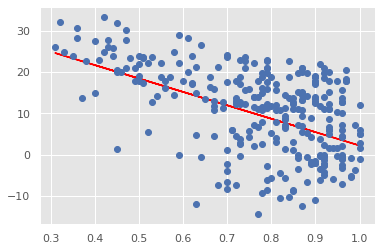

In [ ]:
#Plotando o modelo

import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.plot(teste_X, preds_regr_simples, color="red")

plt.plot(teste_X, teste_Y, 'bo')


plt.show()

### Regressão Múltipla

**Método dos Mínimos quadrados**


In [ ]:
#Usaremos o mesmo target
Y = df['Apparent Temperature (C)']
X = df.iloc[:, :-1]
#refazendo o split
y_train, y_test, X_train, X_test = train_test_split(Y, X, test_size = 0.30, random_state=20)

In [ ]:
#Usando skelarn
reg_ols = LinearRegression()

#treinando o model
reg_ols.fit(X_train, y_train)

print("Coeficientes: {}".format(reg_ols.coef_))
print("Intercept: {}".format(reg_ols.intercept_))

#salvando nossas predicoes
preds_ols_sklearn = reg_ols.predict(X_test)
print('RMSE: %.4f'% mean_squared_error(y_test,preds_ols_sklearn))


Coeficientes: [ 4.96529362e-16  1.00000000e+00 -1.34094125e-15  8.10983225e-16
 -2.77555756e-17]
Intercept: -5.329070518200751e-15
RMSE: 0.0000


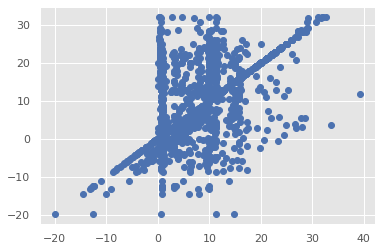

In [ ]:
#Plotando o modelo
plt.plot(X_test, preds_ols_sklearn, 'bo')
plt.show()

**Método de Descida Gradiente**



In [ ]:
from sklearn.linear_model import SGDRegressor
reg_sgd = SGDRegressor()

#treinando o model
reg_sgd.fit(X_train, y_train)

#Coeficientes
print("Coeficientes: {}".format(reg_sgd.coef_))
print("Intercept: {}".format(reg_sgd.intercept_))


#salvando nossas predicoes
preds_sgd_sklearn = reg_sgd.predict(X_test)
print('RMSE: %.4f'% mean_squared_error(y_test, preds_sgd_sklearn))



Coeficientes: [ 8.15367003e+07 -4.50657225e+07  2.23819540e+09  1.98540869e+07
  2.96328927e+07]
Intercept: [-2.46313753e+09]
RMSE: 171154517383342304.0000


Coeficiente: [ 4.92967200e+00  5.74020939e+00  6.65995297e-02 -3.29010056e-01
 -2.07540364e-03]
Intercept: [9.72244279]
RMSE: 0.6642


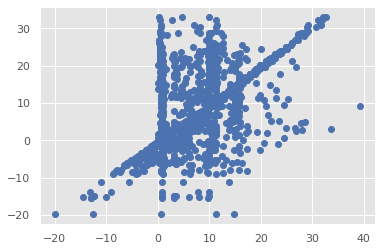

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler() # Padronizando dados

X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.fit_transform(X_test)

#treinando o modelo
reg_sgd.fit(std.fit_transform(X_train_scaled), y_train)

#Coeficientes
print("Coeficiente: {}".format(reg_sgd.coef_))
print("Intercept: {}".format(reg_sgd.intercept_))

#salvando nossas predicoes
preds_sdg_scaled = reg_sgd.predict(X_test_scaled)
print('RMSE: %.4f'% mean_squared_error(y_test, preds_sdg_scaled))

plt.plot(X_test, preds_sdg_scaled, 'bo')
plt.show()



### Métrica de avaliação: Erro Quadrático Médio



$\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2.$

In [ ]:
# MSE
from sklearn.metrics import mean_squared_error
print(' O menor RMSE: %.6f'% mean_squared_error(y_test, preds_ols_sklearn))



 O menor RMSE: 0.000000
